In [1]:
from pyrep import PyRep
from pyrep.robots.arms.ur5 import UR5

In [2]:
import modern_robotics as mr

In [3]:
import numpy as np
np.set_printoptions(suppress=True)
import time
import matplotlib.pyplot as plt
%matplotlib notebook

In [4]:
from UR5_analytical_inverse_kinematics import analytical_inverse_kinematics

# UR5 Numerical Inverse Kinematics

In [5]:
pr = PyRep()
pr.launch(scene_file="./Example_UR5.ttt")
pr.start()

## Helper functions for pyrep and modern_robotics integration

In [6]:
def matrix_from_pyrep(l):
    T = np.eye(4)
    T[:3,:] = np.array(l).reshape(3,4)
    return T

def M_from_arm(arm):
    """Get home configuration matrix from pyrep arm"""
    theta = arm.get_joint_positions()
    arm.set_joint_positions(np.zeros(len(theta)))
    M = matrix_from_pyrep(arm.get_tip().get_matrix())
    arm.set_joint_positions(theta)
    return M

def Slist_from_arm(arm):
    """Get screw axes from pyrep arm """
    def screw_from_pyrep_joint(joint):
        T = np.array(joint.get_matrix()).reshape(3,4)
        omega = T[:,2]
        p = T[:,3]
        v = np.cross(-omega, p)
        S = np.vstack((omega.reshape(3,1),v.reshape(3,1)))
        return S
    theta = arm.get_joint_positions()
    arm.set_joint_positions(np.zeros(len(theta)))
    Slist = np.hstack([screw_from_pyrep_joint(joint) for joint in arm.joints])
    arm.set_joint_positions(theta) 
    return Slist

## Instantiate UR5 arm object

In [7]:
arm = UR5()

## Find zero configuration and screw axes from PyRep object

In [9]:
M, Slist = M_from_arm(arm), Slist_from_arm(arm)

In [10]:
print(M)

[[-1.00000024  0.00000002 -0.00000006  0.81725001]
 [-0.00000006 -0.00000012  1.00000012  0.18495019]
 [ 0.00000002  1.00000012 -0.00000012 -0.00555021]
 [ 0.          0.          0.          1.        ]]


In [10]:
print(Slist)

[[ 0.          0.          0.         -0.00000006 -0.         -0.00000006]
 [-0.          1.00000012  1.00000012  1.          0.00000009  1.        ]
 [ 1.         -0.00000012 -0.00000012  0.         -1.          0.00000006]
 [-0.00000006 -0.08920001 -0.08919995 -0.08919996 -0.11000004  0.00555015]
 [ 0.00000002 -0.          0.00000005 -0.00000001  0.81725001 -0.00000005]
 [ 0.         -0.00000002  0.42509984  0.81724996  0.00000007  0.81725002]]


## Define home configuration

In [16]:
home = np.array([0.0,-np.pi/2.0,np.pi/2,0.0,np.pi/2,0.0])
arm.set_joint_positions(home)

## Move arm

In [18]:
starting_joint_positions = arm.get_joint_positions()



T_FK = mr.FKinSpace(M,Slist, starting_joint_positions)

print(T_FK)
T = matrix_from_pyrep(arm.get_tip().get_matrix())

th_a = analytical_inverse_kinematics(T)

print(home)
print(th_a)

# T = np.eye(4)

DELTA = 0.0

thetas_numerical = []
thetas_analytical = []

def move(index, delta):
    T[index,3] += delta
    new_joint_angles, _= mr.IKinSpace(Slist, M, T, arm.get_joint_positions(), 0.01, 0.001)
    thetas_numerical.append(new_joint_angles)
    thetas_analytical.append(analytical_inverse_kinematics(T))
    arm.set_joint_target_positions(new_joint_angles)
    pr.step()
    
[move(0, -DELTA) for _ in range(10)];
[move(2, -DELTA) for _ in range(10)];
[move(1, -DELTA) for _ in range(10)];
[move(2, DELTA) for _ in range(10)];

[[-0.00011994  0.00226208  0.99999755  0.46747174]
 [ 1.00000023  0.00000015  0.00011994  0.11005456]
 [ 0.00000012  0.99999756 -0.00226232  0.41882662]
 [ 0.          0.          0.          1.        ]]
vec: 
 [-0.00013375  1.00000012 -0.00010467]
vec: 
 [0.00249782 0.00010484 0.99999696]
vec: 
 [ 0.99999702  0.00013334 -0.00249791]
vec: 
 [0.46760151 0.11012042 0.41866228]
p5
vec: 
 [0.38560175 0.11010949 0.41886711]
ph1 -2.8634427077254543
de1 0.2752738289199661
th1 -3.13871653664542
vec: 
 [-0.99999586 -0.00287611  0.        ]
vec: 
 [0 0 1]
vec: 
 [-0.00287611  0.99999586  0.        ]
vec: 
 [0.00249791 0.00000718 0.99999688]
vec: 
 [ 0.99999274  0.0028761  -0.00249792]
vec: 
 [0.38567795 0.00110926 0.3238674 ]
[ 0.         -1.57079633  1.57079633  0.          1.57079633  0.        ]
[2.7058018  1.65746079 0.08536178 1.57994647 1.33976643 2.69707351]
vec: 
 [-0.00013375  1.00000012 -0.00010467]
vec: 
 [0.00249782 0.00010484 0.99999696]
vec: 
 [ 0.99999702  0.00013334 -0.00249791]

vec: 
 [-0.00013375  1.00000012 -0.00010467]
vec: 
 [0.00249782 0.00010484 0.99999696]
vec: 
 [ 0.99999702  0.00013334 -0.00249791]
vec: 
 [0.46760151 0.11012042 0.41866228]
p5
vec: 
 [0.38560175 0.11010949 0.41886711]
ph1 -2.8634427077254543
de1 0.2752738289199661
th1 -3.13871653664542
vec: 
 [-0.99999586 -0.00287611  0.        ]
vec: 
 [0 0 1]
vec: 
 [-0.00287611  0.99999586  0.        ]
vec: 
 [0.00249791 0.00000718 0.99999688]
vec: 
 [ 0.99999274  0.0028761  -0.00249792]
vec: 
 [0.38567795 0.00110926 0.3238674 ]
vec: 
 [-0.00013375  1.00000012 -0.00010467]
vec: 
 [0.00249782 0.00010484 0.99999696]
vec: 
 [ 0.99999702  0.00013334 -0.00249791]
vec: 
 [0.46760151 0.11012042 0.41866228]
p5
vec: 
 [0.38560175 0.11010949 0.41886711]
ph1 -2.8634427077254543
de1 0.2752738289199661
th1 -3.13871653664542
vec: 
 [-0.99999586 -0.00287611  0.        ]
vec: 
 [0 0 1]
vec: 
 [-0.00287611  0.99999586  0.        ]
vec: 
 [0.00249791 0.00000718 0.99999688]
vec: 
 [ 0.99999274  0.0028761  -0.00249792

In [13]:
T = [move(0, -DELTA) for _ in range(10)];
T = [move(2, -DELTA) for _ in range(10)];
T = [move(1, -DELTA) for _ in range(10)];
T = [move(2, DELTA) for _ in range(10)];

vec: 
 [-0.00000024  1.          0.00000027]
vec: 
 [-0.00000006 -0.00000036  1.        ]
vec: 
 [1.00000012 0.00000006 0.        ]
vec: 
 [0.46710047 0.10999984 0.41954967]
vec: 
 [0.38510046 0.10999984 0.41954967]
vec: 
 [-0.99999663 -0.00259534  0.        ]
vec: 
 [0 0 1]
vec: 
 [-0.00259534  0.99999663  0.        ]
vec: 
 [-0. -0.  1.]
vec: 
 [0.99999663 0.00259534 0.        ]
vec: 
 [0.38538335 0.00100021 0.32454967]
heisann
vec: 
 [-0.00000024  1.          0.00000027]
vec: 
 [-0.00000006 -0.00000036  1.        ]
vec: 
 [1.00000012 0.00000006 0.        ]
vec: 
 [0.46710047 0.10999984 0.41954967]
vec: 
 [0.38510046 0.10999984 0.41954967]
vec: 
 [-0.99999663 -0.00259534  0.        ]
vec: 
 [0 0 1]
vec: 
 [-0.00259534  0.99999663  0.        ]
vec: 
 [-0. -0.  1.]
vec: 
 [0.99999663 0.00259534 0.        ]
vec: 
 [0.38538335 0.00100021 0.32454967]
heisann
vec: 
 [-0.00000024  1.          0.00000027]
vec: 
 [-0.00000006 -0.00000036  1.        ]
vec: 
 [1.00000012 0.00000006 0.        ]


TypeError: list indices must be integers or slices, not tuple

<IPython.core.display.Javascript object>


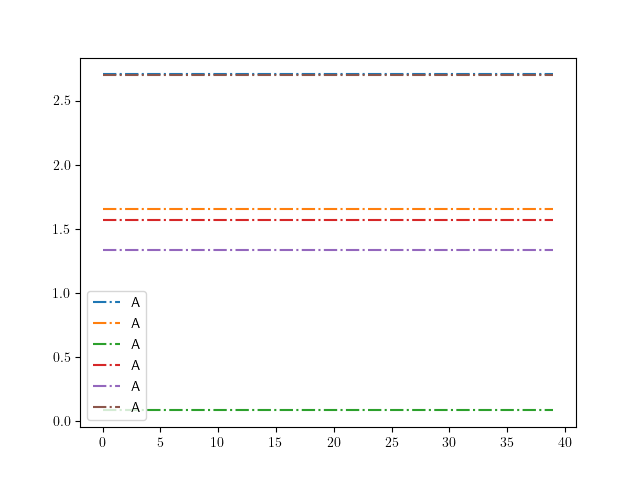

In [13]:
#plt.plot(np.array(thetas_numerical).reshape(-1, 6), label='N');
plt.plot(np.array(thetas_analytical).reshape(-1, 6), linestyle='-.', label='A');
plt.legend();

In [20]:
thetas_numerical


[array([ 0.        , -1.57079637,  1.57079637,  0.        ,  1.57079637,
         0.        ]),
 array([ 0.00000286, -1.57076132,  1.57079685,  0.00002122,  1.57079637,
         0.        ]),
 array([ 0.00000596, -1.57072604,  1.57079661,  0.00004292,  1.57079661,
         0.        ]),
 array([ 0.00000906, -1.57069051,  1.57079685,  0.00006413,  1.57079709,
         0.        ]),
 array([ 0.00001192, -1.57065547,  1.57079709,  0.00008535,  1.57079709,
         0.        ]),
 array([ 0.00001454, -1.57061994,  1.57079709,  0.00010657,  1.57079709,
         0.        ]),
 array([ 0.0000174 , -1.57058489,  1.57079685,  0.00012827,  1.57079709,
         0.        ]),
 array([ 0.00002027, -1.57054937,  1.57079685,  0.00014949,  1.57079756,
         0.        ]),
 array([ 0.00002313, -1.57051432,  1.57079661,  0.00017071,  1.57079756,
         0.        ]),
 array([ 0.00002623, -1.5704788 ,  1.57079685,  0.00019193,  1.57079709,
         0.        ]),
 array([ 0.00002885, -1.57044375,  1.570

In [ ]:
pr.stop()
pr.shutdown()